In [35]:
from Lshape16 import Q2Q1FEM
from flow_solver.finite_element_model import FEM
from flow_solver.mesh_generator import MeshLChannel

import numpy as np

# L-Channel Test Case: Flow Solution (No Optimization)

## Computational Meshes

In [36]:
n_elem_for_width = 16
mesh_v = MeshLChannel('Q2', n_elem_for_width)
mesh_p = MeshLChannel('Q1', n_elem_for_width)

## Material Properties

In [37]:
viscosity = 1.0
density = 0.0

## FEM Solver (New Code Structure)

In [38]:
fem = FEM(mesh_v, mesh_p, viscosity, density)

## Boundary Conditions

In [39]:
def inlet_velocity(mesh, i_node):
    x = mesh.coords[i_node][0]; y = mesh.coords[i_node][1]
    v_x = 0.0; v_y = 4*(1.-x)*(2.-x)  
    return np.array([v_x, v_y])

In [40]:
def outlet_velocity(mesh, i_node):
    x = mesh.coords[i_node][0]; y = mesh.coords[i_node][1]
    v_x = -4*(1.-y)*y; v_y = 0.0 
    return np.array([v_x, v_y])

In [41]:
# Compute boundary velocities.
boundary_velocity = {key: [] for key in mesh_v.boundary_nodes.keys()}

for boundary in mesh_v.boundary_nodes.keys():
    for i_node in mesh_v.boundary_nodes[boundary]:
        if boundary == 'inlet':
            boundary_velocity[boundary].append(inlet_velocity(mesh_v, i_node))
        elif boundary == 'outlet':
            boundary_velocity[boundary].append(outlet_velocity(mesh_v, i_node))
        elif boundary == 'wall':
            boundary_velocity[boundary].append(np.zeros(2))
# Set values for Dirichlet boundary conditions.
# Velocity.
BC = []
for boundary in mesh_v.boundary_nodes.keys():
    for i_node, node in enumerate(mesh_v.boundary_nodes[boundary]):
        if boundary == 'inlet' or boundary == 'wall':
            BC.append([node, 0, boundary_velocity[boundary][i_node][0]])
            BC.append([node, 1, boundary_velocity[boundary][i_node][1]])
        elif boundary == 'outlet':
            # TODO v_x at the outlet should not be prescribed!
            BC.append([node, 0, boundary_velocity[boundary][i_node][0]]) 
            BC.append([node, 1, boundary_velocity[boundary][i_node][1]])
boundary_values_v = np.array(BC)

# Pressure.
BC = []
for boundary in mesh_p.boundary_nodes.keys():
    for i_node, node in enumerate(mesh_p.boundary_nodes[boundary]):
        if boundary == 'inlet' or boundary == 'wall':
            pass
boundary_values_p= np.array(BC)

## FEM Solution (Old Code)

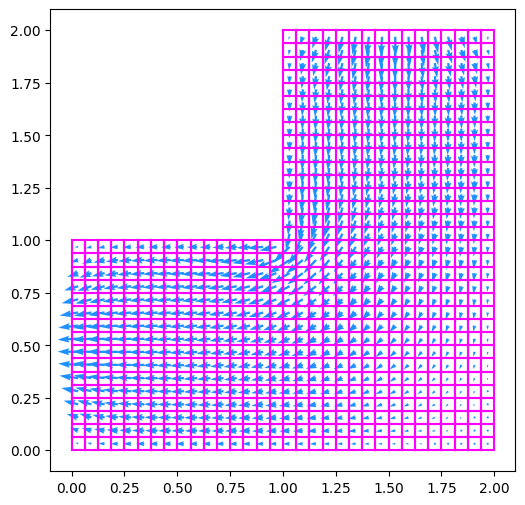

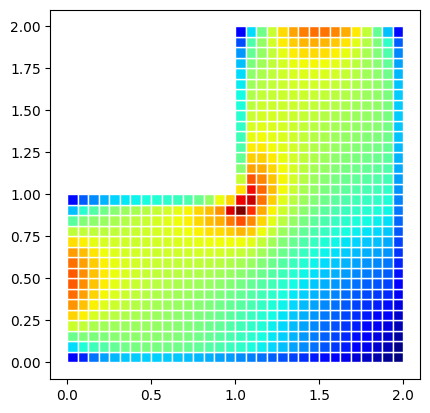

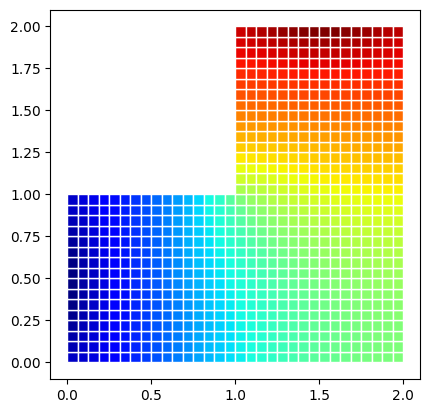

In [42]:
element_density = density*np.ones(mesh_v.n_elem)
p,f_new,u,v = Q2Q1FEM.Q2Q1FEM(mesh_v.coords, mesh_v.elements, boundary_values_v,
                              mesh_p.coords, mesh_p.elements, boundary_values_p,
                              element_density) 
Q2Q1FEM.Plot_quiver(mesh_v.coords, mesh_v.elements, u, v)
velocity_magnitude = np.sqrt(u**2+v**2)
Q2Q1FEM.Plot_patch(n_elem_for_width, mesh_v.coords, mesh_v.elements, velocity_magnitude, max(velocity_magnitude), min(velocity_magnitude), cmap='jet')
Q2Q1FEM.Plot_patch(n_elem_for_width, mesh_v.coords ,mesh_v.elements,p,max(p),min(p),cmap='jet')

## FEM Solution (New Code)

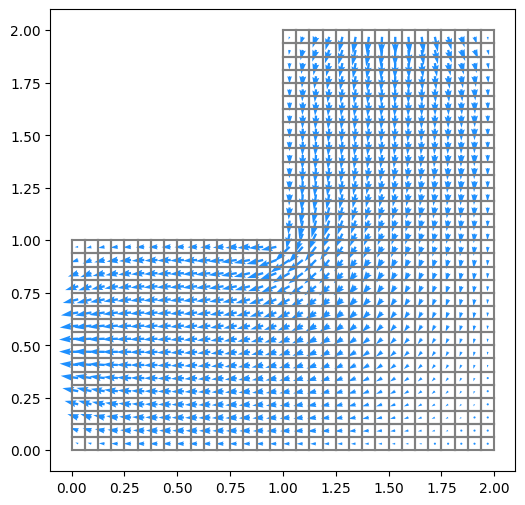

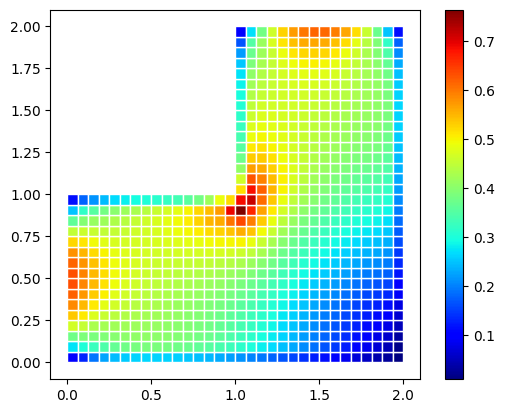

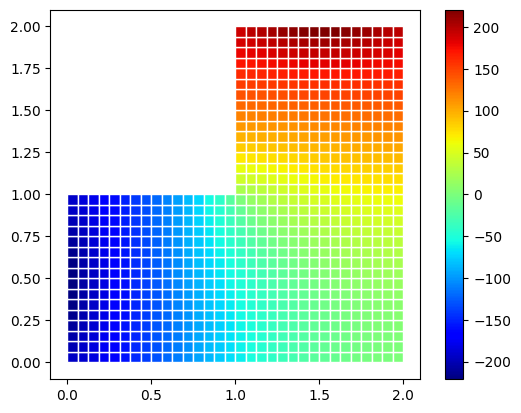

In [43]:
fem.set_boudary_values_v(boundary_values_v)
U, u_e, v_e, p_e, F, f = fem.solve()
fem.plot_velocity_field([u_e, v_e])
fem.plot_velocity_magnitude([u_e, v_e])
fem.plot_pressure(p_e)